In [40]:
import pandas as pd
import numpy as np

In [43]:
rentsmart_all = pd.read_csv('data/rentsmart_20211130.csv', 
                            parse_dates=True, \
                            dtype={'zip_code': str })
rentsmart_all.head()

,date,violotaion_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [44]:
rentsmart_all.rename(columns={'violotaion_type': 'violation_type'}, inplace=True)
rentsmart_all.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [45]:
# check if there are any missing addresses
rentsmart_all[rentsmart_all['address'].isna()]

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude


In [46]:
rentsmart_all.shape

(309307, 13)

In [47]:
rentsmart_all['date'].max(), rentsmart_all['date'].min()

('2021-11-29 00:00:00', '2016-12-26 11:47:00')

In [48]:
# get a dataframe with only data for 2011
rentsmart_2021 = rentsmart_all[rentsmart_all['date'] >= '2021-01-01']
rentsmart_2021.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [49]:
rentsmart_2021.shape, rentsmart_2021['date'].min(), rentsmart_2021['date'].max()

((58910, 13), '2021-01-01 00:00:00', '2021-11-29 00:00:00')

In [50]:
rentsmart_2021.sample(n=10)

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
31288,2021-07-07 00:00:00,Enforcement Violations,Improper storage trash: com,"45 Bowdoin St, 02114",Boston,02114,300044000,MILLER DAVID A TS,1899.0,2003.0,Mixed Use (Res. and Comm.),42.359671,-71.063051
27026,2021-07-29 10:46:00,Housing Complaints,Chronic Dampness/Mold,"15 Dana Ave, 02136",Hyde Park,02136,1809276000,15 DANA AVENUE LLC,2015.0,NaN,Mixed Use (Res. and Comm.),42.253800,-71.124670
6786,2021-10-19 00:00:00,Building Violations,Testing & Certification,"34-38 Prince St, 02113",Boston,02113,302349000,RICVAN TRUST,1900.0,1950.0,Mixed Use (Res. and Comm.),42.364534,-71.054534
50506,2021-02-26 00:00:00,Enforcement Violations,Failure clear sidewalk - snow,"30-32 Westmore Rd, 02126",Mattapan,02126,1404850000,BUSH FENDRICK,1925.0,NaN,Residential 2-family,42.284410,-71.096250
26537,2021-08-02 07:38:00,Housing Complaints,Contractors Complaint,"45 Dorset St, 02125",Dorchester,02125,703203000,OLSZEWSKI ANDRZEJ BE,1925.0,NaN,Residential 1-family,42.324214,-71.059163
19246,2021-08-30 13:14:00,Sanitation Requests,Empty Litter Basket,"19H Tileston St, 02113",Boston,02113,302086000,NINETEEN-HF TILESTON STREET,1900.0,NaN,Condominium Main*,42.365641,-71.053665
15713,2021-09-07 00:00:00,Enforcement Violations,Illegal dumping < 1 cubic yd,"10-12 Belfort St, 02125",Dorchester,02125,1302897000,MCLAUGHLIN EDITH H,1900.0,1996.0,Residential 2-family,42.315439,-71.055891
5564,2021-10-26 00:00:00,Enforcement Violations,Overgrown Weeds On Property,"50 Theodore St, 02124",Dorchester,02124,1403474000,MOORE JUANITA M,1950.0,NaN,Residential 1-family,42.283670,-71.088770
44121,2021-04-12 00:00:00,Enforcement Violations,Overfilling of barrel/dumpster,"2000 Commonwealth Ave, 02135",Brighton,02135,2102464000,TRUSTEES OF BOSTON COLLEGE,1999.0,2009.0,Condominium Main*,42.339420,-71.158520
11620,2021-09-24 19:12:00,Sanitation Requests,Abandoned Vehicles,"43 Hallowell St, 02126",Mattapan,02126,1802269000,WALKER RICH,1940.0,NaN,Residential 1-family,42.272260,-71.099910


In [51]:
rentsmart_2021.dtypes

date               object
violation_type     object
description        object
address            object
neighborhood       object
zip_code           object
parcel              int64
owner              object
year built        float64
year remodeled    float64
property_type      object
latitude          float64
longitude         float64
dtype: object

In [53]:
rentsmart_2021['violation_type'].value_counts()

Enforcement Violations        39150
Housing Complaints            10493
Sanitation Requests            7305
Civic Maintenance Requests     1109
Building Violations             550
Housing Violations              303
Name: violation_type, dtype: int64

In [55]:
# top 10 violation descriptions
rentsmart_2021['description'].value_counts()[:10]

Improper storage trash: res         25271
Overfilling of barrel/dumpster       4970
Abandoned Vehicles                   3333
Overgrown Weeds On Property          2800
Rodent Activity                      2564
Failure clear sidewalk - snow        1881
Unsatisfactory Living Conditions     1511
Contractors Complaint                1397
Illegal dumping < 1 cubic yd         1391
Work w/out Permit                    1197
Name: description, dtype: int64

In [58]:
rentsmart_2021_owner = rentsmart_2021[['violation_type', 'owner']].groupby('owner').count()

In [63]:
top_10_violators = rentsmart_2021_owner.sort_values(by=['violation_type'], ascending=False)[:10]
top_10_violators

,violation_type
owner,
GBM PORTFOLIO OWNER LLC,523
COPLEY CONDOMINIUM TRUST,101
CS-3553 WASHINGTON ST LLC MASS LLC,98
500 BLUE HILL AVENUE,95
CESCO LLC MASS LLC,84
ROIFF PAUL G TS,80
SCHROER CYNTHIA L,79
TS LAND TRUST LLC,76
LACONCHA LIMITED PARTNERSHIP,74


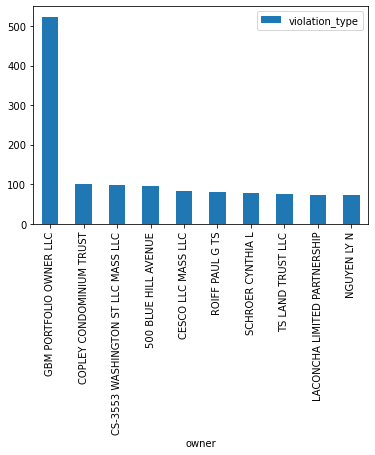

In [64]:
top_10_violators.plot(kind='bar')

In [66]:
len(rentsmart_2021[rentsmart_2021['owner']=='GBM PORTFOLIO OWNER LLC'])

523

In [67]:
len(rentsmart_2021[rentsmart_2021['owner']=='COPLEY CONDOMINIUM TRUST'])

101

In [68]:
gbm = rentsmart_2021[rentsmart_2021['owner']=='GBM PORTFOLIO OWNER LLC']
gbm.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
49,2021-11-28 00:00:00,Enforcement Violations,Overfilling of barrel/dumpster,"480-486 Norfolk St, 02126",Mattapan,02126,1800832000,GBM PORTFOLIO OWNER LLC,1965.0,1982.0,Residential 7 or more units,42.279680,-71.088470
61,2021-11-28 00:00:00,Enforcement Violations,Improper storage trash: res,"480-486 Norfolk St, 02126",Mattapan,02126,1800832000,GBM PORTFOLIO OWNER LLC,1965.0,1982.0,Residential 7 or more units,42.279680,-71.088470
285,2021-11-26 09:26:00,Housing Complaints,"Heat - Excessive, Insufficient","89 Tennis Rd #102, 02126",Mattapan,02126,1803085000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.277440,-71.097340
387,2021-11-24 11:39:00,Housing Complaints,Unsatisfactory Living Conditions,"1045 River St, 02136",Hyde Park,02136,1808175000,GBM PORTFOLIO OWNER LLC,1970.0,1980.0,Residential 7 or more units,42.259629,-71.117247
608,2021-11-23 00:00:00,Enforcement Violations,Improper storage trash: res,"430 River St, 02126",Mattapan,02126,1800014000,GBM PORTFOLIO OWNER LLC,1940.0,1975.0,Residential 7 or more units,42.269080,-71.091030


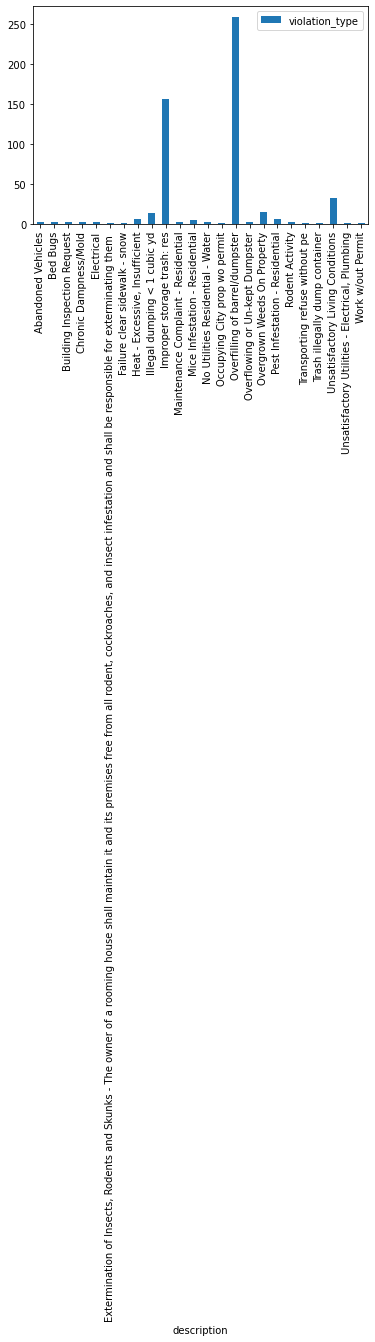

In [74]:
gbm[['description', 'violation_type']].groupby('description').count().plot(kind='bar')

In [ ]:
# use folium to plot violations for Boston
# https://python-visualization.github.io/folium/quickstart.html#Getting-Started
